In [1]:
import torch
import torch.nn as nn

import random
from PIL import Image

from torchvision import transforms

from captcha.image import ImageCaptcha

In [2]:
from model.attention_ocr import OCR
from utils.dataset import CaptchaDataset
from utils.train_util import train_batch, eval_batch
from utils.tokenizer import Tokenizer

In [3]:
img_width = 160
img_height = 60
max_len = 4

nh = 512

device = 'cpu'

In [6]:
chars = list('1234567890abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ')
gen = ImageCaptcha(img_width, img_height)
n_chars = 4

In [7]:
tokenizer = Tokenizer(chars)
model = OCR(img_width, img_height, nh, tokenizer.n_token,
                max_len + 1, tokenizer.SOS_token, tokenizer.EOS_token).to(device=device)


Model feature size: 5 17


In [8]:
model.load_state_dict(torch.load('./chkpoint/time_2020-03-12_22-26-09_epoch_30.pth'))

<All keys matched successfully>

In [9]:
img_trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=(0.229, 0.224, 0.225)),
])


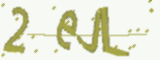

In [12]:
content = [random.randrange(0, len(chars)) for _ in range(n_chars)]
s = ''.join([chars[i] for i in content])
d = gen.generate(s)
d = Image.open(d)
d

In [13]:
model.eval()
with torch.no_grad():
    pred = model(img_trans(d).unsqueeze(0))
    
rst = tokenizer.translate(pred.squeeze(0).argmax(1))
print(rst)

2eJL-
